In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import sys
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))

from methods.utils import dynamic
from methods import mmca, mcmc
from parameters import Initial_data
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [3]:
# 导入默认参数
file_path = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), 'parameters/inital_data_1.pkl')
with open(file_path, 'rb') as f:
    init_data = pickle.load(f)

epi_paras = torch.tensor(init_data['epi_paras'], dtype=torch.float32).to(device)
soc_paras = torch.tensor(init_data['soc_paras'], dtype=torch.float32).to(device)
features_state = torch.tensor(init_data['init_state'], dtype=torch.float32).to(device)
features_prob = torch.tensor(init_data['init_prob'], dtype=torch.float32).to(device)
P_rows, P_cols = init_data['P_matrix'].nonzero()
P_edge_index = torch.tensor(np.array([P_rows, P_cols]), dtype=torch.long).to(device)
I_rows, I_cols = init_data['I_matrix'].nonzero()
I_edge_index = torch.tensor(np.array([I_rows, I_cols]), dtype=torch.long).to(device)

In [4]:
# beta-lam phase
para_len = 64
# xlm, xmh, gl, gm, gh = 1/2, 1/2, 0.1, 0.5, 0.9 # obs-->ga

soc_paras_xlm_gh_mmca = soc_paras.unsqueeze(0).repeat(para_len, 1)
epi_paras_xlm_gh_mmca = epi_paras.unsqueeze(0).repeat(para_len, 1, 1) 

features_prob_tensor = features_prob.unsqueeze(0).repeat(para_len, 1, 1).to(device)
delta_t = 0.1
time_scale = int(50/delta_t)
mmca_method = mmca.MMCA(device)

xlm_values = torch.linspace(0, 1, para_len).to(device)
gh_values = torch.linspace(0, 1, para_len).to(device)

soc_paras_xlm_gh_mmca[...,0] = xlm_values
soc_paras_xlm_gh_mmca[...,1] = xlm_values
soc_paras_xlm_gh_mmca[...,2] = 0.01

xlm_gh_phase = torch.zeros(para_len,para_len,5)

In [11]:
process = 0
for i in range(gh_values.shape[0]):
    soc_paras_xlm_gh_mmca[...,4] = gh_values[i]
    features_times_beta_lam_mmca, _ = dynamic(time_scale, mmca_method, features_prob_tensor.clone(), epi_paras_xlm_gh_mmca,\
                                                   soc_paras_xlm_gh_mmca, P_edge_index, I_edge_index, device, obs = 2)
    xlm_gh_phase[:,i,:] = features_times_beta_lam_mmca[:,-1,:]
    process += 1
    print(f'已经完成第 {process} 个数据！')
torch.save(xlm_gh_phase.cpu(), 'data/xlm_gh_phase.pt')

已经完成第 1 个数据！
已经完成第 2 个数据！
已经完成第 3 个数据！
已经完成第 4 个数据！
已经完成第 5 个数据！
已经完成第 6 个数据！
已经完成第 7 个数据！
已经完成第 8 个数据！
已经完成第 9 个数据！
已经完成第 10 个数据！
已经完成第 11 个数据！
已经完成第 12 个数据！
已经完成第 13 个数据！
已经完成第 14 个数据！
已经完成第 15 个数据！
已经完成第 16 个数据！
已经完成第 17 个数据！
已经完成第 18 个数据！
已经完成第 19 个数据！
已经完成第 20 个数据！
已经完成第 21 个数据！
已经完成第 22 个数据！
已经完成第 23 个数据！
已经完成第 24 个数据！
已经完成第 25 个数据！
已经完成第 26 个数据！
已经完成第 27 个数据！
已经完成第 28 个数据！
已经完成第 29 个数据！
已经完成第 30 个数据！
已经完成第 31 个数据！
已经完成第 32 个数据！
已经完成第 33 个数据！
已经完成第 34 个数据！
已经完成第 35 个数据！
已经完成第 36 个数据！
已经完成第 37 个数据！
已经完成第 38 个数据！
已经完成第 39 个数据！
已经完成第 40 个数据！
已经完成第 41 个数据！
已经完成第 42 个数据！
已经完成第 43 个数据！
已经完成第 44 个数据！
已经完成第 45 个数据！
已经完成第 46 个数据！
已经完成第 47 个数据！
已经完成第 48 个数据！
已经完成第 49 个数据！
已经完成第 50 个数据！
已经完成第 51 个数据！
已经完成第 52 个数据！
已经完成第 53 个数据！
已经完成第 54 个数据！
已经完成第 55 个数据！
已经完成第 56 个数据！
已经完成第 57 个数据！
已经完成第 58 个数据！
已经完成第 59 个数据！
已经完成第 60 个数据！
已经完成第 61 个数据！
已经完成第 62 个数据！
已经完成第 63 个数据！
已经完成第 64 个数据！


C:\Users\95406\AppData\Local\Temp\ipykernel_27440\1908652249.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  xlm_gh_phase = torch.load('data/xlm_gh_phase.pt')


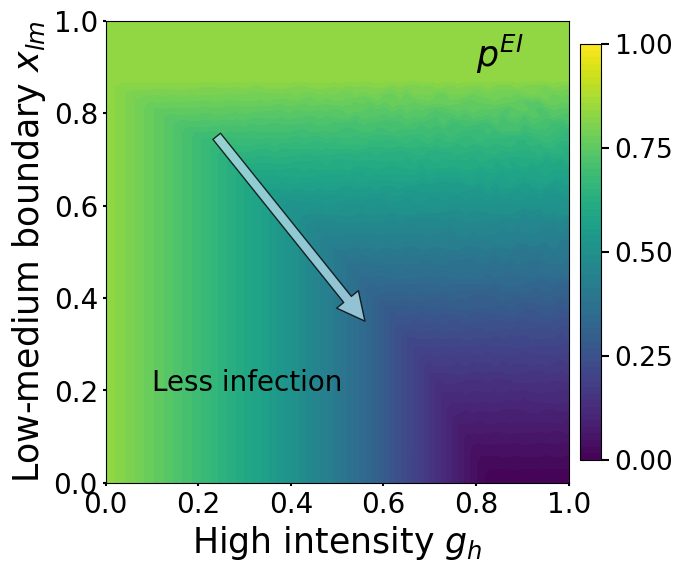

In [9]:
xlm_gh_phase = torch.load('data/xlm_gh_phase.pt')

pEI_mmca = torch.sum(xlm_gh_phase[...,[2,3,4]],dim=-1)
# data = torch.sum(xlm_gh_phase[...,[1]],dim=-1)

# 绘制相图
plt.figure(figsize=(7.2, 6))  # 设置图像大小
# 使用 xlm_values, gh_values 作为横纵坐标
X, Y = np.meshgrid(xlm_values.to('cpu'), gh_values.to('cpu'))
plt.contourf(X, Y, pEI_mmca, levels=np.linspace(0,  1.0, 64), cmap='viridis', origin='lower')  # 填充等高线图

cbar = plt.colorbar( orientation='vertical', shrink=0.9, pad=0.02)  # 添加颜色条
cbar.set_ticks(np.linspace(0,  1.0, 5))
# cbar.set_label(r'$\log \beta_c$', fontsize=15) 
cbar.ax.tick_params(labelsize=19, length=6, width=1.5)



plt.ylabel(r'Low-medium boundary $x_{lm}$', fontsize=25)  # X轴标签
plt.xlabel(r'High intensity $g_h$', fontsize=25)  # Y轴标签
plt.tick_params(axis='both', which='major', labelsize=20, length=2, width=1.5)
plt.text(0.8, 0.9, r'$p^{EI}$', fontsize=25, color='black')

# 添加箭头
plt.annotate('', xy=(0.6, 0.3), xytext=(0.2, 0.8),
            arrowprops=dict(connectionstyle='arc3',width=7, headwidth=20, headlength=20,
                             shrink=0.1, fc='lightblue', ec='black', alpha=0.8))
plt.text(0.1, 0.2, 'Less infection', fontsize=20, color='black')

# plt.show()
plt.savefig(f'../figs/Steady_state/xlm_gh_phase.svg', bbox_inches='tight')
plt.savefig(f'../figs/Steady_state/xlm_gh_phase.png', dpi=600)


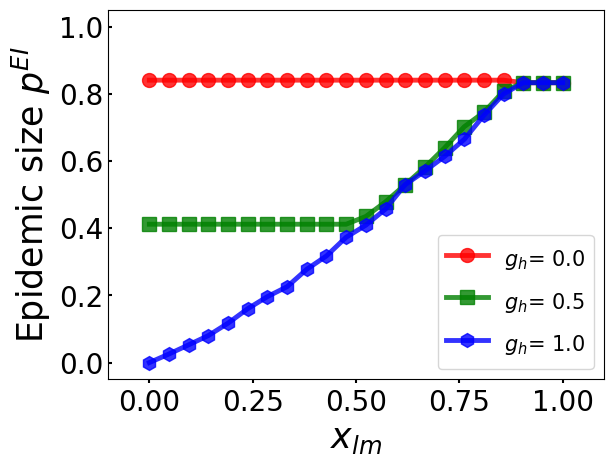

In [11]:
index_lam = [0,31,63]
# lam 可视化
# gh_values xlm_values
data1 = pEI_mmca[:,index_lam[0]]
data2 = pEI_mmca[:,index_lam[1]]
data3 = pEI_mmca[:,index_lam[2]]

fig, ax = plt.subplots()

ax.plot(xlm_values.cpu()[::3], data1[::3], color='red', linewidth=3.5, linestyle='-',  marker='o',\
        markersize=10, label=r'$g_h$' + f'= {gh_values[index_lam[0]]:.1f}', alpha=0.8)

ax.plot(xlm_values.cpu()[::3], data2[::3], color='green', linewidth=3.5, linestyle='-',  marker='s',\
        markersize=10, label=r'$g_h$' + f'= {gh_values[index_lam[1]]:.1f}', alpha=0.8)

ax.plot(xlm_values.cpu()[::3], data3[::3], color='blue', linewidth=3.5, linestyle='-',  marker='h',\
        markersize=10, label=r'$g_h$' + f'= {gh_values[index_lam[2]]:.1f}', alpha=0.8)


# 设置坐标轴标签
ax.set_xlabel(r'$x_{lm}$', fontsize=25, color='black')
ax.set_ylabel(r'Epidemic size $p^{EI}$', fontsize=25, color='black')
ax.tick_params(axis='x', labelsize=20, length=3, width=1.5, color='black', direction='out')
ax.tick_params(axis='y', labelsize=20, length=3, width=1.5, color='black', direction='in')
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.05, 1.05)

# 设置顶部文字
ax.legend(fontsize=15, handlelength=2, handleheight=2)

# 显示图形
plt.show()

fig.savefig(f'../figs/Steady_state/gh.svg', bbox_inches='tight')

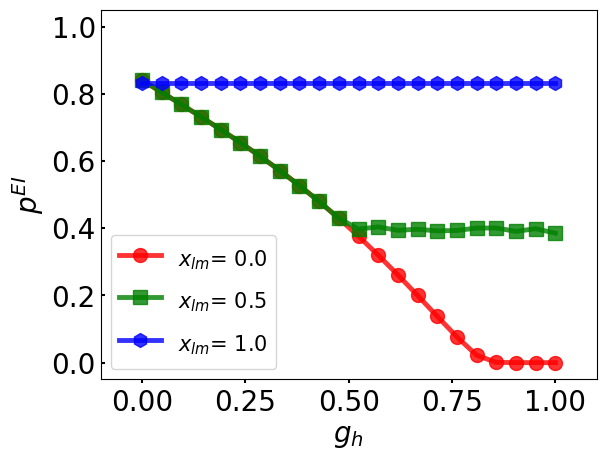

In [14]:
index_lam = [0,31,63]
# lam 可视化
# gh_values xlm_values
data1 = pEI_mmca[index_lam[0]]
data2 = pEI_mmca[index_lam[1]]
data3 = pEI_mmca[index_lam[2]]

fig, ax = plt.subplots()

ax.plot(gh_values.cpu()[::3], data1[::3], color='red', linewidth=3.5, linestyle='-',  marker='o',\
        markersize=10, label=r'$x_{lm}$' + f'= {xlm_values[index_lam[0]]:.1f}', alpha=0.8)

ax.plot(gh_values.cpu()[::3], data2[::3], color='green', linewidth=3.5, linestyle='-',  marker='s',\
        markersize=10, label=r'$x_{lm}$' + f'= {xlm_values[index_lam[1]]:.1f}', alpha=0.8)

ax.plot(gh_values.cpu()[::3], data3[::3], color='blue', linewidth=3.5, linestyle='-',  marker='h',\
        markersize=10, label=r'$x_{lm}$' + f'= {xlm_values[index_lam[2]]:.1f}', alpha=0.8)


# 设置坐标轴标签
ax.set_xlabel(r'$g_{h}$', fontsize=20, color='black')
ax.set_ylabel(r'$p^{EI}$', fontsize=20, color='black')
ax.tick_params(axis='x', labelsize=20, length=3, width=1.5, color='black', direction='out')
ax.tick_params(axis='y', labelsize=20, length=3, width=1.5, color='black', direction='in')
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.05, 1.05)

# 设置顶部文字
ax.legend(fontsize=15, handlelength=2, handleheight=2)

# 显示图形
plt.show()

fig.savefig(f'../figs/Steady_state/xlm.svg', bbox_inches='tight')


In [13]:
# beta-lam phase
# xlm, xmh, gl, gm, gh = 1/2, 1/2, 0.1, 0.5, 0.9 # obs-->ga
para_len = 64
soc_paras_kgm_kgh_mmca = soc_paras.unsqueeze(0).repeat(para_len, 1)
epi_paras_kgm_kgh_mmca = epi_paras.unsqueeze(0).repeat(para_len, 1, 1) 

features_prob_tensor = features_prob.unsqueeze(0).repeat(para_len, 1, 1).to(device)
mmca_method = mmca.MMCA(device)

kgm_values = torch.linspace(0, 1, para_len).to(device)
kgh_values = torch.linspace(0, 1, para_len).to(device)

soc_paras_kgm_kgh_mmca[...,5] = kgm_values 

epi_paras_kgm_kgh_mmca[...,3] = 0.05

kgm_kgh_phase = torch.zeros(para_len,para_len,5)

In [ ]:
process = 0
for i in range(kgh_values.shape[0]):
    soc_paras_kgm_kgh_mmca[...,6] = kgh_values[i]
    features_times_kgm_kgh_mmca, _ = dynamic(time_scale, mmca_method, features_prob_tensor.clone(), epi_paras_kgm_kgh_mmca,\
                                                   soc_paras_kgm_kgh_mmca, P_edge_index, I_edge_index, device)
    kgm_kgh_phase[:,i,:] = torch.mean(features_times_kgm_kgh_mmca[:,-100:,:],dim = 1)
    process += 1
    print(f'已经完成第 {process} 个数据！')
torch.save(kgm_kgh_phase.cpu(), 'data/kgm_kgh_phase.pt')

已经完成第 1 个数据！
已经完成第 2 个数据！
已经完成第 3 个数据！
已经完成第 4 个数据！
已经完成第 5 个数据！
已经完成第 6 个数据！
已经完成第 7 个数据！
已经完成第 8 个数据！
已经完成第 9 个数据！
已经完成第 10 个数据！
已经完成第 11 个数据！
已经完成第 12 个数据！
已经完成第 13 个数据！
已经完成第 14 个数据！
已经完成第 15 个数据！
已经完成第 16 个数据！
已经完成第 17 个数据！
已经完成第 18 个数据！
已经完成第 19 个数据！
已经完成第 20 个数据！
已经完成第 21 个数据！
已经完成第 22 个数据！
已经完成第 23 个数据！
已经完成第 24 个数据！
已经完成第 25 个数据！
已经完成第 26 个数据！
已经完成第 27 个数据！
已经完成第 28 个数据！
已经完成第 29 个数据！
已经完成第 30 个数据！
已经完成第 31 个数据！
已经完成第 32 个数据！
已经完成第 33 个数据！
已经完成第 34 个数据！
已经完成第 35 个数据！
已经完成第 36 个数据！
已经完成第 37 个数据！
已经完成第 38 个数据！
已经完成第 39 个数据！
已经完成第 40 个数据！
已经完成第 41 个数据！
已经完成第 42 个数据！
已经完成第 43 个数据！
已经完成第 44 个数据！
已经完成第 45 个数据！
已经完成第 46 个数据！
已经完成第 47 个数据！
已经完成第 48 个数据！
已经完成第 49 个数据！
已经完成第 50 个数据！
已经完成第 51 个数据！
已经完成第 52 个数据！
已经完成第 53 个数据！
已经完成第 54 个数据！
已经完成第 55 个数据！
已经完成第 56 个数据！
已经完成第 57 个数据！
已经完成第 58 个数据！
已经完成第 59 个数据！
已经完成第 60 个数据！
已经完成第 61 个数据！
已经完成第 62 个数据！
已经完成第 63 个数据！
已经完成第 64 个数据！


C:\Users\95406\AppData\Local\Temp\ipykernel_27440\3840331026.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  kgm_kgh_phase = torch.load('data/kgm_kgh_phase.pt')


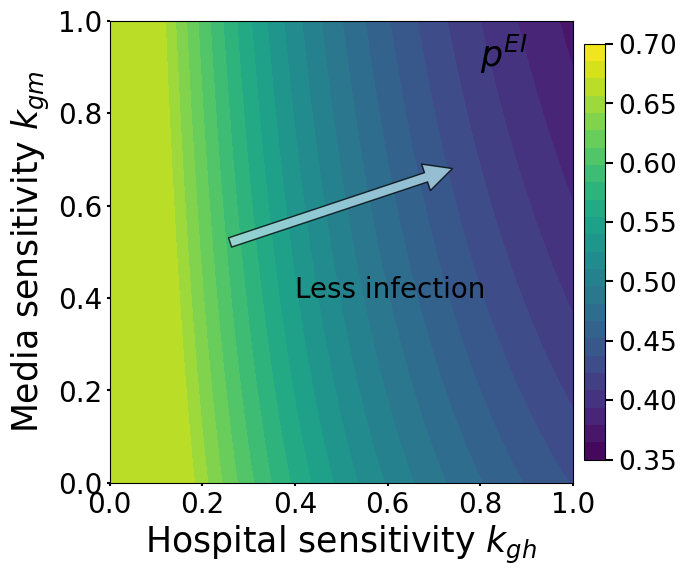

In [14]:
kgm_kgh_phase = torch.load('data/kgm_kgh_phase.pt')

pEI_mmca = torch.sum(kgm_kgh_phase[...,[2,3,4]],dim=-1)


# 绘制相图
plt.figure(figsize=(7.2, 6))  # 设置图像大小
# 使用 xlm_values, gh_values 作为横纵坐标
X, Y = np.meshgrid(kgm_values.to('cpu'), kgh_values.to('cpu'))
plt.contourf(X, Y, pEI_mmca, levels=np.linspace(0.35,  0.7, 25), cmap='viridis', origin='lower')  # 填充等高线图

cbar = plt.colorbar( orientation='vertical', shrink=0.9, pad=0.02)  # 添加颜色条
cbar.set_ticks(np.linspace(0.35,  0.7, 8))
# cbar.set_label(r'$\log \beta_c$', fontsize=15) 
cbar.ax.tick_params(labelsize=19, length=6, width=1.5)

plt.ylabel(r'Media sensitivity $k_{gm}$', fontsize=25)  # X轴标签
plt.xlabel(r'Hospital sensitivity $k_{gh}$', fontsize=25)  # Y轴标签
plt.tick_params(axis='both', which='major', labelsize=20, length=2, width=1.5)
plt.text(0.8, 0.9, r'$p^{EI}$', fontsize=25, color='black')

# 添加箭头
plt.annotate('', xy=(0.8, 0.7), xytext=(0.2, 0.5),
            arrowprops=dict(connectionstyle='arc3',width=7, headwidth=20, headlength=20,
                             shrink=0.1, fc='lightblue', ec='black', alpha=0.8))
plt.text(0.4, 0.4, 'Less infection', fontsize=20, color='black')

# plt.show()
plt.savefig(f'../figs/Steady_state/kgm_kgh_phase.svg', bbox_inches='tight')
plt.savefig(f'../figs/Steady_state/kgm_kgh_phase.png', dpi=600)

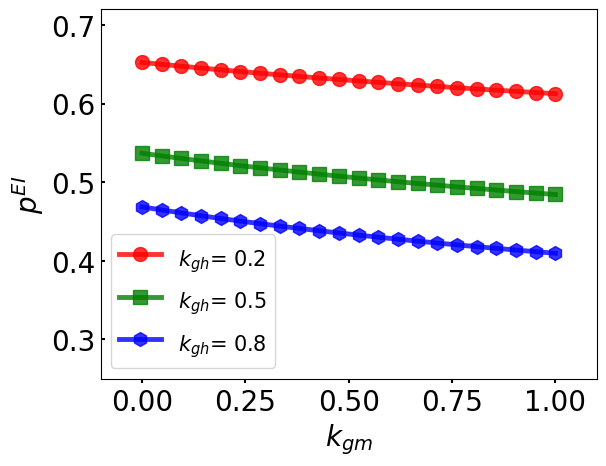

In [25]:
index_lam = [12,31,50]
# lam 可视化
# kgm_values kgh_values
data1 = pEI_mmca[:,index_lam[0]]
data2 = pEI_mmca[:,index_lam[1]]
data3 = pEI_mmca[:,index_lam[2]]

fig, ax = plt.subplots()

ax.plot(kgm_values.cpu()[::3], data1[::3], color='red', linewidth=3.5, linestyle='-',  marker='o',\
        markersize=10, label=r'$k_{gh}$' + f'= {kgh_values[index_lam[0]]:.1f}', alpha=0.8)

ax.plot(kgm_values.cpu()[::3], data2[::3], color='green', linewidth=3.5, linestyle='-',  marker='s',\
        markersize=10, label=r'$k_{gh}$' + f'= {kgh_values[index_lam[1]]:.1f}', alpha=0.8)

ax.plot(kgm_values.cpu()[::3], data3[::3], color='blue', linewidth=3.5, linestyle='-',  marker='h',\
        markersize=10, label=r'$k_{gh}$' + f'= {kgh_values[index_lam[2]]:.1f}', alpha=0.8)


# 设置坐标轴标签
ax.set_xlabel(r'$k_{gm}$', fontsize=20, color='black')
ax.set_ylabel(r'$p^{EI}$', fontsize=20, color='black')
ax.tick_params(axis='x', labelsize=20, length=3, width=1.5, color='black', direction='out')
ax.tick_params(axis='y', labelsize=20, length=3, width=1.5, color='black', direction='in')
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(0.25, 0.72)

# 设置顶部文字
ax.legend(fontsize=15, handlelength=2, handleheight=2)

# 显示图形
plt.show()

fig.savefig(f'../figs/Steady_state/kgh.svg', bbox_inches='tight')

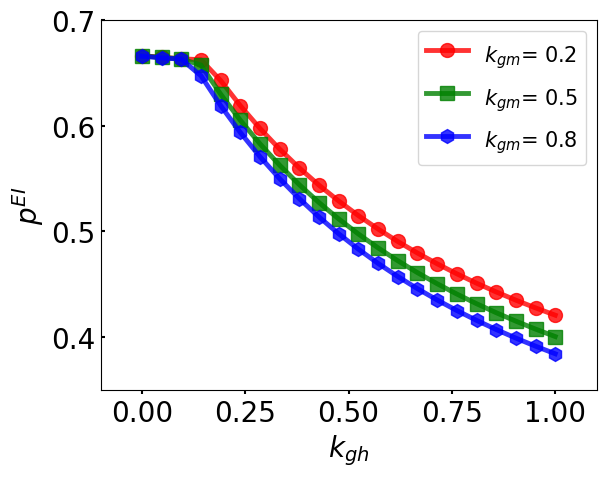

In [26]:
index_lam = [12,31,50]
# lam 可视化
# kgm_values kgh_values
data1 = pEI_mmca[index_lam[0]]
data2 = pEI_mmca[index_lam[1]]
data3 = pEI_mmca[index_lam[2]]

fig, ax = plt.subplots()

ax.plot(kgh_values.cpu()[::3], data1[::3], color='red', linewidth=3.5, linestyle='-',  marker='o',\
        markersize=10, label=r'$k_{gm}$' + f'= {kgm_values[index_lam[0]]:.1f}', alpha=0.8)

ax.plot(kgh_values.cpu()[::3], data2[::3], color='green', linewidth=3.5, linestyle='-',  marker='s',\
        markersize=10, label=r'$k_{gm}$' + f'= {kgm_values[index_lam[1]]:.1f}', alpha=0.8)

ax.plot(kgh_values.cpu()[::3], data3[::3], color='blue', linewidth=3.5, linestyle='-',  marker='h',\
        markersize=10, label=r'$k_{gm}$' + f'= {kgm_values[index_lam[2]]:.1f}', alpha=0.8)


# 设置坐标轴标签
ax.set_xlabel(r'$k_{gh}$', fontsize=20, color='black')
ax.set_ylabel(r'$p^{EI}$', fontsize=20, color='black')
ax.tick_params(axis='x', labelsize=20, length=3, width=1.5, color='black', direction='out')
ax.tick_params(axis='y', labelsize=20, length=3, width=1.5, color='black', direction='in')
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(0.35, 0.7)

# 设置顶部文字
ax.legend(fontsize=15, handlelength=2, handleheight=2)

# 显示图形
plt.show()

fig.savefig(f'../figs/Steady_state/kgm.svg', bbox_inches='tight')